In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [255]:
df = pd.read_csv(r'C:\Users\talia\OneDrive\שולחן העבודה\data science project\gender classification.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [256]:
df.shape

(5001, 8)

In [257]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


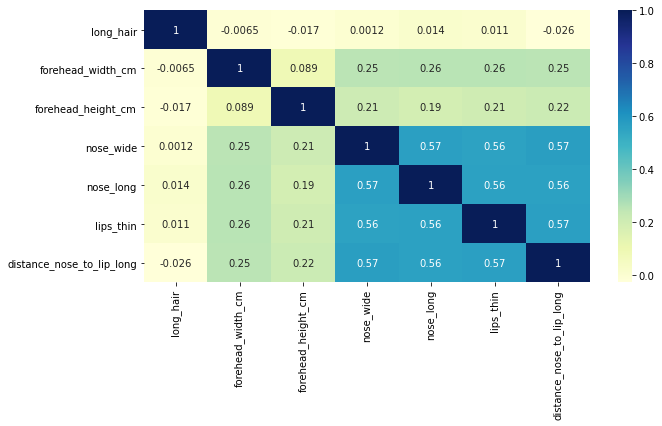

In [259]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [260]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [261]:
df['gender'] = df['gender'].replace('Female',1, regex=True) 
df['gender'] = df['gender'].replace('Male',0, regex=True) 
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,1
4997,1,11.9,5.4,0,0,0,0,1
4998,1,12.9,5.7,0,0,0,0,1
4999,1,13.2,6.2,0,0,0,0,1


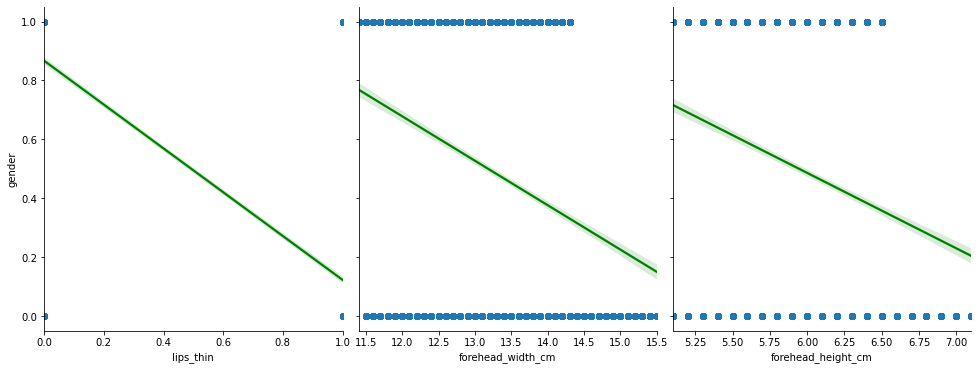

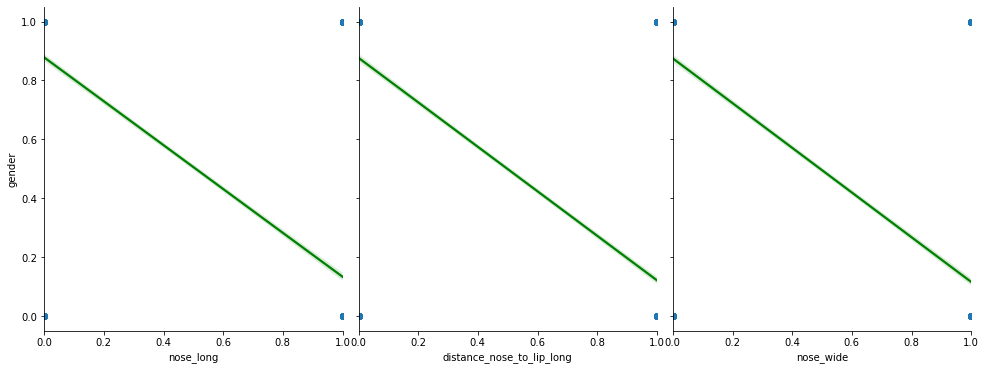

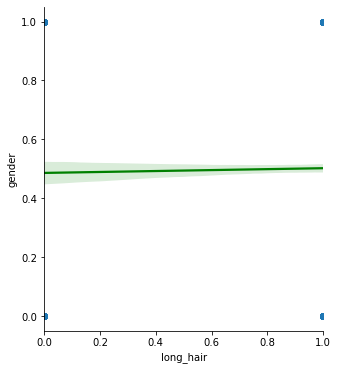

In [262]:
#let us see how the features affects the classification
featureA = {'lips_thin','forehead_height_cm','forehead_width_cm'}
featureB = {'nose_wide','nose_long','distance_nose_to_lip_long'}
sns.pairplot(df, y_vars="gender", x_vars=featureA, kind='reg',height=5, aspect=0.9,plot_kws={'line_kws':{'color':'green'}})
sns.pairplot(df, y_vars="gender", x_vars=featureB, kind='reg',height=5, aspect=0.9,plot_kws={'line_kws':{'color':'green'}})
sns.pairplot(df, y_vars="gender", x_vars='long_hair', kind='reg',height=5, aspect=0.9,plot_kws={'line_kws':{'color':'green'}})

well the long_hair feature is not affecting at all, so lets get rid of it:

In [263]:
df.drop(["long_hair"], axis = 1, inplace = True)
df

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,11.8,6.1,1,0,1,1,0
1,14.0,5.4,0,0,1,0,1
2,11.8,6.3,1,1,1,1,0
3,14.4,6.1,0,1,1,1,0
4,13.5,5.9,0,0,0,0,1
...,...,...,...,...,...,...,...
4996,13.6,5.1,0,0,0,0,1
4997,11.9,5.4,0,0,0,0,1
4998,12.9,5.7,0,0,0,0,1
4999,13.2,6.2,0,0,0,0,1


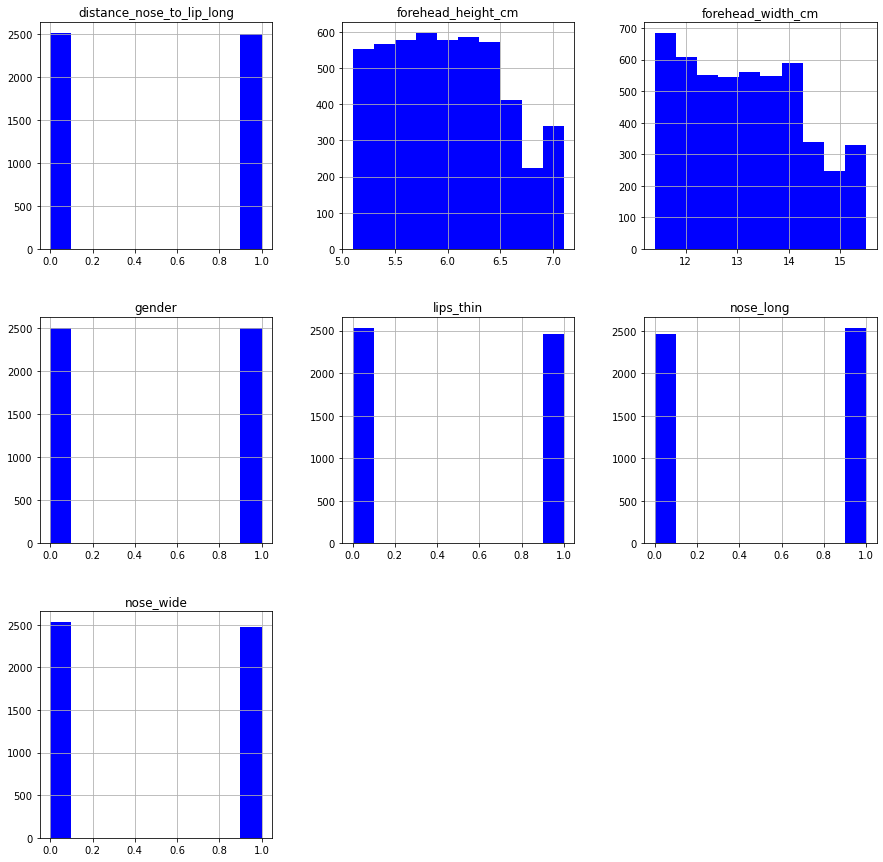

In [264]:
df.hist(figsize=(15,15),color='b')
plt.show()

# Modeling
### K-Nearest Neighbours

In [265]:
from sklearn.model_selection import train_test_split
train = df.drop('gender', axis=1)
test = df["gender"]
# Split data
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.15, random_state=42)

In [266]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

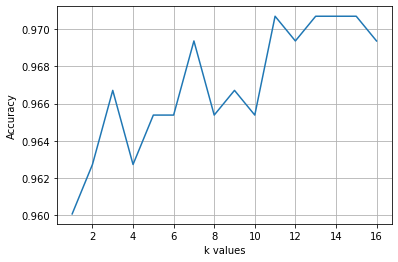

In [281]:
score_list = []
for each in range(1,17):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_test, y_test))
plt.plot(range(1,17), score_list)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

so here we get that the best k is 15

In [268]:
#cross validation
score = cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
print(score)

[0.98684211 0.96       0.97333333 0.94666667 0.96       0.98666667
 0.96       0.96       0.94666667 0.94666667]


# confusion_matrix
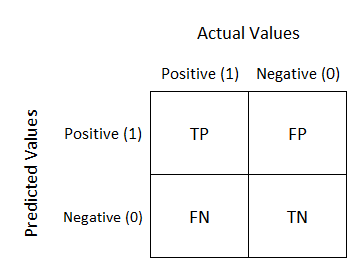

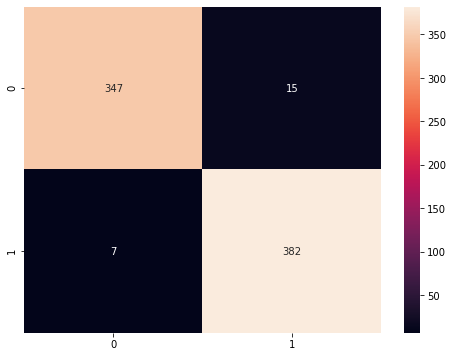

In [269]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
con_mat = confusion_matrix(y_test, knn_pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

In [270]:
metrics.accuracy_score(y_test, knn_pred)

0.9707057256990679

# ROC curve:

$\text{TPR} = \frac{TP}{TP + FN}$

$\text{FPR} = \frac{FP}{TN + FP}$

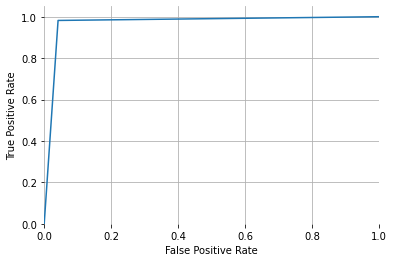

In [271]:
from sklearn.metrics import  roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, _= roc_curve(y_test, knn_pred)
auc= roc_auc_score(y_test, knn_pred)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.box(False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### dummy model

In [272]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,y_train)
dummy_pred = dummy_clf.predict(X_test)

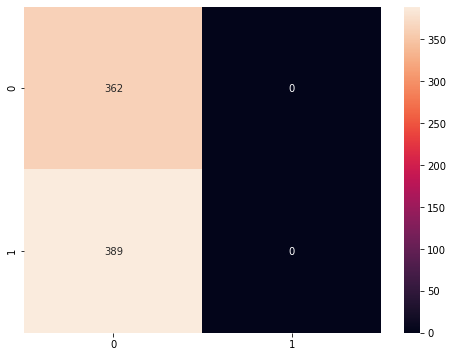

In [273]:
con_mat = confusion_matrix(y_test, dummy_pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

In [274]:
metrics.accuracy_score(y_test, dummy_pred)

0.48202396804260983

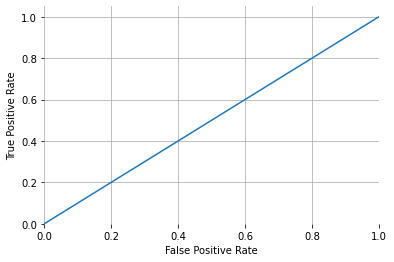

In [275]:
fpr, tpr, _= roc_curve(y_test, dummy_pred)
auc= roc_auc_score(y_test, dummy_pred)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.box(False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### Logistic Regression model

In [276]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

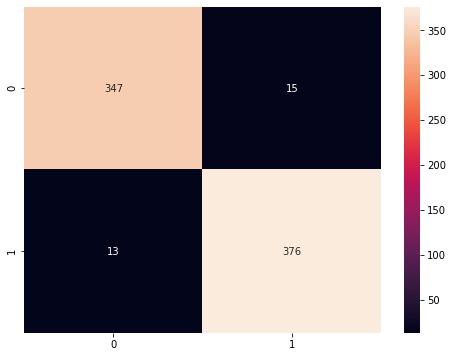

In [278]:
con_mat = confusion_matrix(y_test, lr_pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

In [279]:
metrics.accuracy_score(y_test, lr_pred)

0.96271637816245

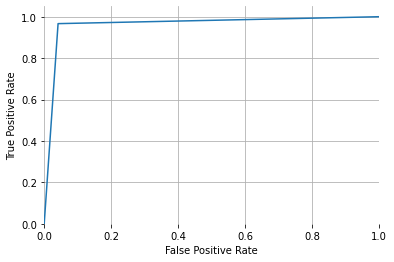

In [280]:
fpr, tpr, _= roc_curve(y_test, lr_pred)
auc= roc_auc_score(y_test, lr_pred)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.box(False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# well, we can see that there is not much of a difference between the Logistic Regression model and the KNN model, and they both are way better then the dummy